In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as st

In [11]:
df = pd.read_csv("breast cancer dataset.csv")

In [12]:
if 'diagnosis' in df.columns:
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [13]:
df_numeric = df.select_dtypes(include=[np.number])

In [14]:
summary_stats = df_numeric.describe()
print("\n📊 Summary Statistics:\n", summary_stats)



📊 Summary Statistics:
                  id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813 

In [15]:
z_scores = np.abs(stats.zscore(df_numeric))
outliers = (z_scores > 3).sum()
print("\n🚨 Outliers Count:\n", outliers)


🚨 Outliers Count:
 id                         11
diagnosis                   0
radius_mean                 5
texture_mean                4
perimeter_mean              7
area_mean                   8
smoothness_mean             5
compactness_mean            9
concavity_mean              9
concave points_mean         6
symmetry_mean               5
fractal_dimension_mean      7
radius_se                   7
texture_se                  9
perimeter_se                8
area_se                     6
smoothness_se               7
compactness_se             12
concavity_se                6
concave points_se           6
symmetry_se                11
fractal_dimension_se       10
radius_worst                6
texture_worst               4
perimeter_worst             6
area_worst                 10
smoothness_worst            3
compactness_worst          10
concavity_worst             7
concave points_worst        0
symmetry_worst              9
fractal_dimension_worst     9
Unnamed: 32         

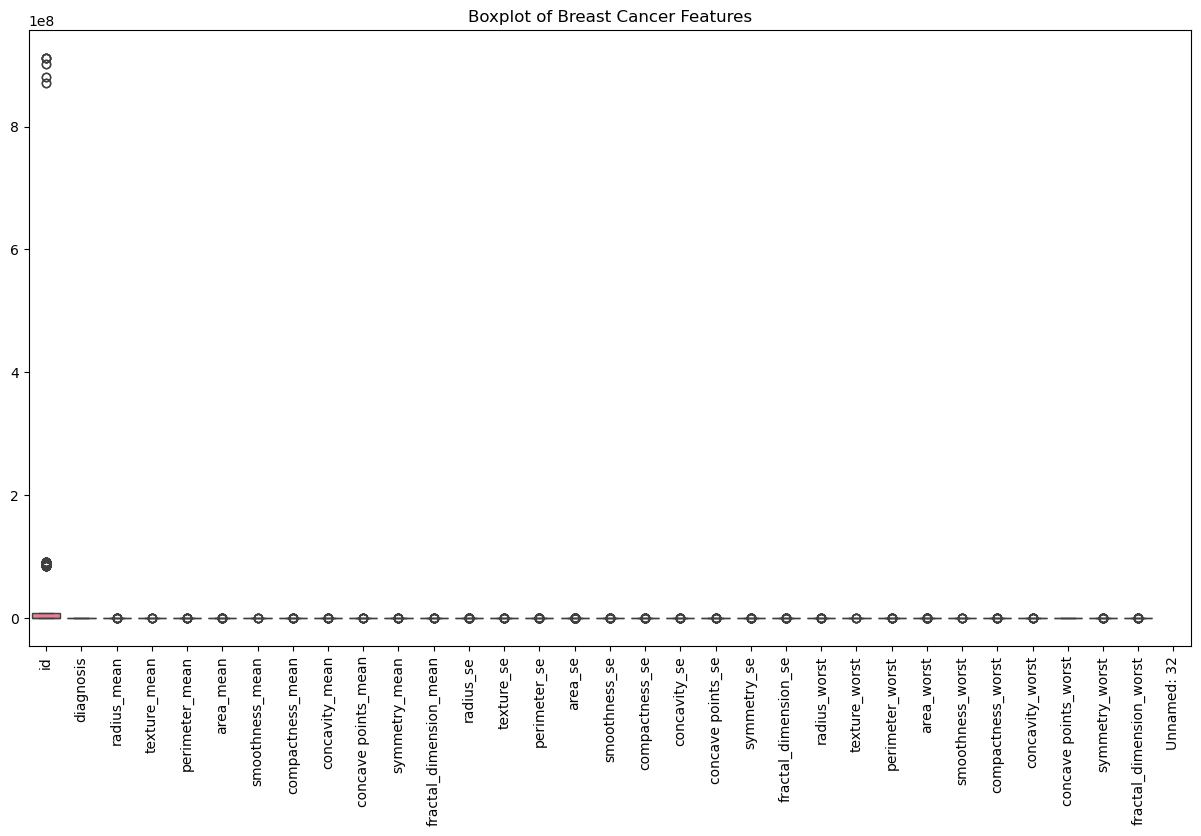

In [16]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)
plt.title("Boxplot of Breast Cancer Features")
plt.show()

In [17]:
feature = 'radius_mean'  
sorted_data = np.sort(df_numeric[feature])
cdf = np.arange(len(sorted_data)) / float(len(sorted_data))

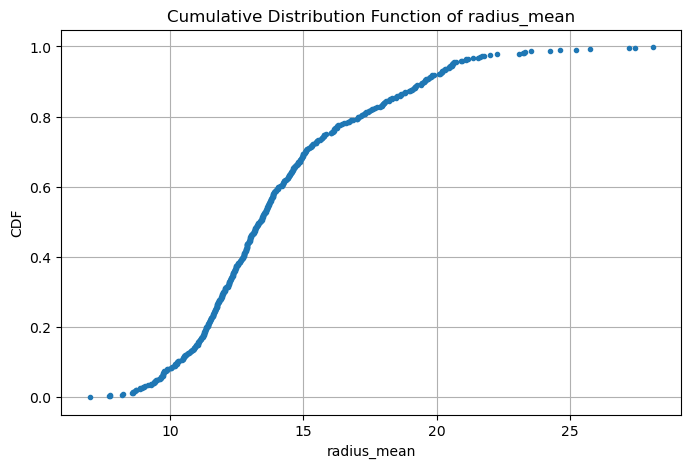

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(sorted_data, cdf, marker=".", linestyle="none")
plt.xlabel(feature)
plt.ylabel("CDF")
plt.title(f"Cumulative Distribution Function of {feature}")
plt.grid()
plt.show()


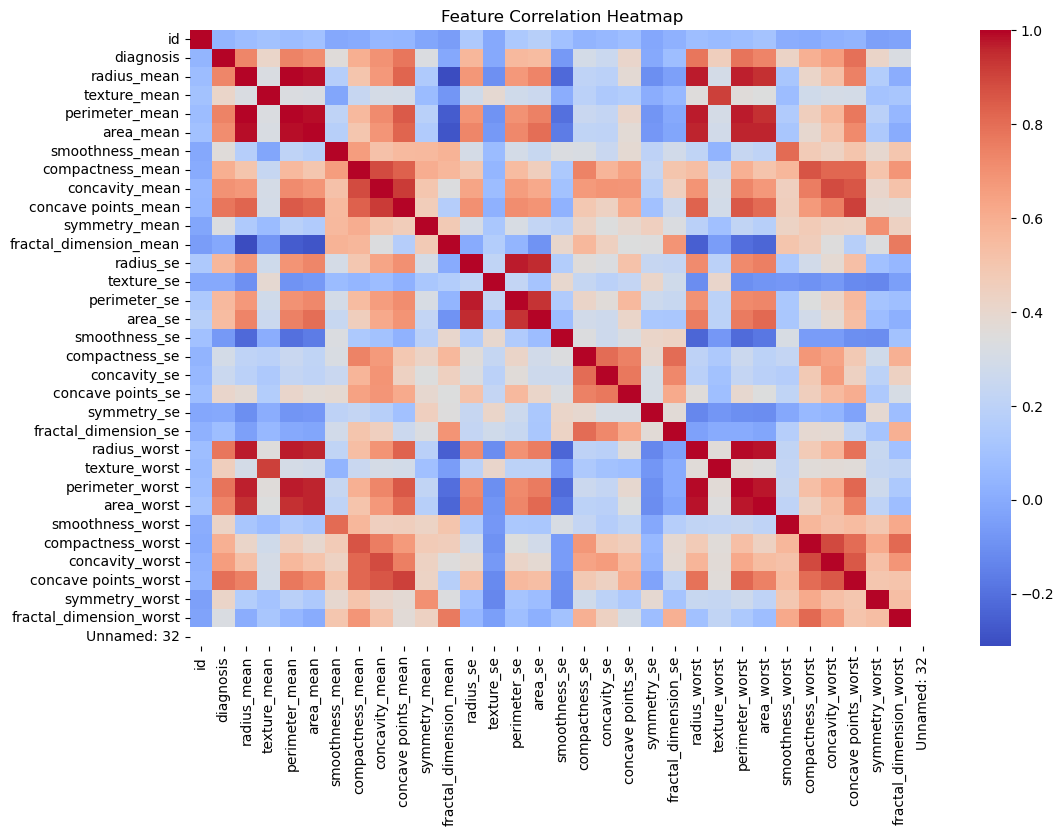

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [20]:
cov_matrix = df_numeric.cov()
print("\n📈 Covariance Matrix:\n", cov_matrix)


📈 Covariance Matrix:
                                    id     diagnosis   radius_mean  \
id                       1.563015e+16  2.405983e+06  3.287883e+07   
diagnosis                2.405983e+06  2.341766e-01  1.244954e+00   
radius_mean              3.287883e+07  1.244954e+00  1.241892e+01   
texture_mean             5.364807e+07  8.641453e-01  4.907582e+00   
perimeter_mean           2.222490e+08  8.732438e+00  8.544714e+01   
area_mean                4.262946e+09  1.207382e+02  1.224483e+03   
smoothness_mean         -2.280205e+04  2.440318e-03  8.454460e-03   
compactness_mean         6.318839e+02  1.524564e-02  9.419706e-02   
concavity_mean           4.991277e+05  2.686406e-02  1.901276e-01   
concave points_mean      2.142177e+05  1.458278e-02  1.124751e-01   
symmetry_mean           -7.579262e+04  4.384481e-03  1.427317e-02   
fractal_dimension_mean  -4.635137e+04 -4.386142e-05 -7.753706e-03   
radius_se                4.959431e+06  7.610744e-02  6.636503e-01   
texture_se 

In [21]:

pearson_corr = df_numeric.corr(method='pearson')
print("\n🔗 Pearson Correlation Coefficients:\n", pearson_corr)


🔗 Pearson Correlation Coefficients:
                                id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     

In [22]:
malignant = df[df['diagnosis'] == 1]['radius_mean']
benign = df[df['diagnosis'] == 0]['radius_mean']

t_stat, p_value = stats.ttest_ind(malignant, benign)
print(f"\n📊 Hypothesis Test (t-test) on 'radius_mean':\nT-statistic = {t_stat:.4f}, P-value = {p_value:.4f}")


📊 Hypothesis Test (t-test) on 'radius_mean':
T-statistic = 25.4358, P-value = 0.0000


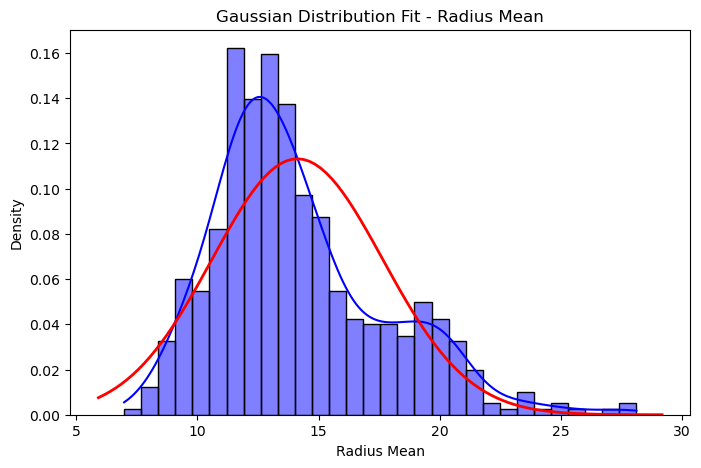

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df_numeric['radius_mean'], kde=True, stat="density", bins=30, color='blue')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, df_numeric['radius_mean'].mean(), df_numeric['radius_mean'].std())
plt.plot(x, p, 'r', linewidth=2)
plt.title("Gaussian Distribution Fit - Radius Mean")
plt.xlabel("Radius Mean")
plt.ylabel("Density")
plt.show()


In [24]:
z_scores_df = stats.zscore(df_numeric)
z_scores_df = pd.DataFrame(z_scores_df, columns=df_numeric.columns)
print("\n🔢 Z-score for first 5 rows:\n", z_scores_df.head())



🔢 Z-score for first 5 rows:
          id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0 -0.236405   1.297676     1.097064     -2.073335        1.269934   0.984375   
1 -0.236403   1.297676     1.829821     -0.353632        1.685955   1.908708   
2  0.431741   1.297676     1.579888      0.456187        1.566503   1.558884   
3  0.432121   1.297676    -0.768909      0.253732       -0.592687  -0.764464   
4  0.432201   1.297676     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   ...  texture_worst  per